# A Cartographers Expedition

Harold wants to have a no-cellphones birthday weekend. This means you have to come up with some way to vet out what locations everyone wants to hit up while in NYC and plot the routes to each location. Harold wants to use a regular map, but you have something better: Plotly Express Mapbox map plots! 

Don your cartographers hat and create map plots that will pinpoint the location of the places you'll be visitng. Use this as the map/intinerary for Harold's birthday expedition.

In [7]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Key

In [9]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Prep Data

In [11]:
# Read in data
places_of_interest = pd.read_csv(Path('Resources/harold_bday_plans.csv')).dropna()
places_of_interest.head()

,Id,Longitude,Latitude,Name,PlaceType,Borough
0,90,-73.888958,40.896210,Van Cortlandt Park,Park,Bronx
1,95,-73.871651,40.889879,Woodlawn Cemetery,Cemetery,Bronx
2,81,-73.838642,40.886965,Seton Falls Park,Park,Bronx
3,69,-73.809802,40.877986,Pelham Bay Park,Park,Bronx
4,8,-73.878308,40.864424,Botanical Garden,Garden,Bronx


### Route 1

In [12]:
# Plot course for first route
first_route = places_of_interest[
    (places_of_interest["Name"].str.contains("Airport"))
    | (places_of_interest["Name"].isin(["Aqueduct Race Track", "Astoria Park"]))
]
first_route

,Id,Longitude,Latitude,Name,PlaceType,Borough
26,3,-73.924269,40.776792,Astoria Park,Park,Queens
39,2,-73.830624,40.672194,Aqueduct Race Track,Track,Queens
85,48,-73.785999,40.648068,John F. Kennedy International Airport,International Airport,Queens


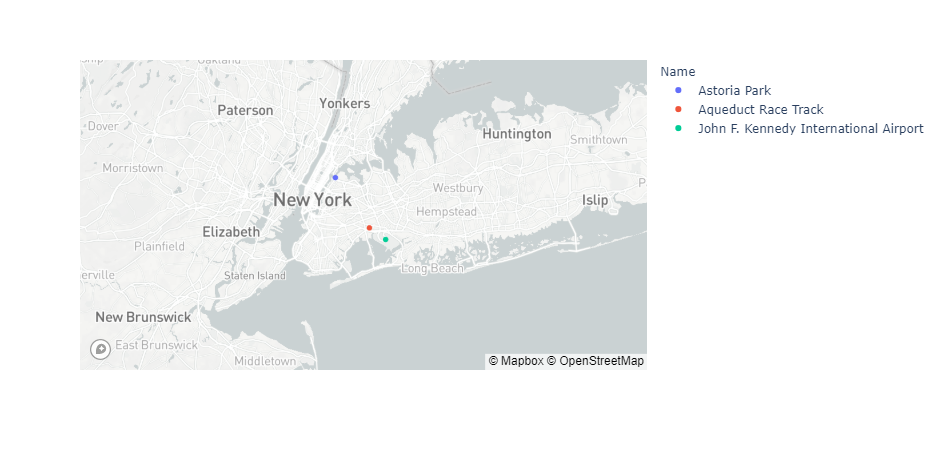

In [13]:
route_1 = px.scatter_mapbox(first_route, lat="Latitude", lon="Longitude", color="Name")
route_1.show()

### Route 2

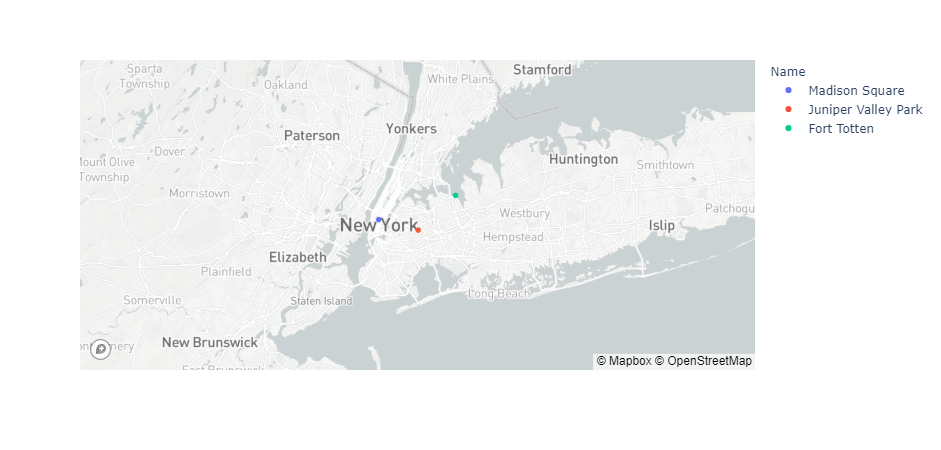

In [14]:
# Plot course for second route
second_route = places_of_interest[
    places_of_interest["Name"].isin(
        ["Fort Totten", "Juniper Valley Park", "Madison Square"]
    )
]
route_2 = px.scatter_mapbox(second_route, lat="Latitude", lon="Longitude", color="Name")
route_2.show()

### Route 3

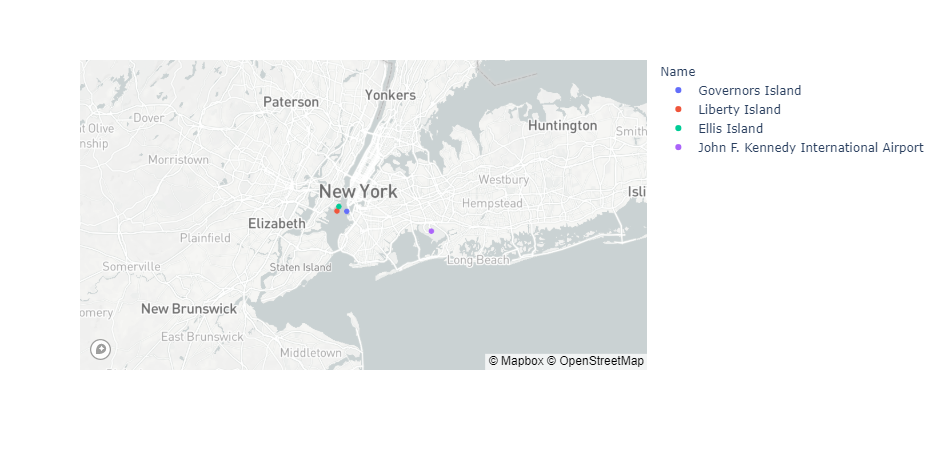

In [15]:
# Plot course for third route
third_route = places_of_interest[
    (
        places_of_interest["Name"].isin(
            ["Governors Island", "Liberty Island", "Ellis Island"]
        )
    )
    | (places_of_interest["Name"].str.contains("Airport"))
]
route_3 = px.scatter_mapbox(third_route, lat="Latitude", lon="Longitude", color="Name")
route_3.show()

### All Stops

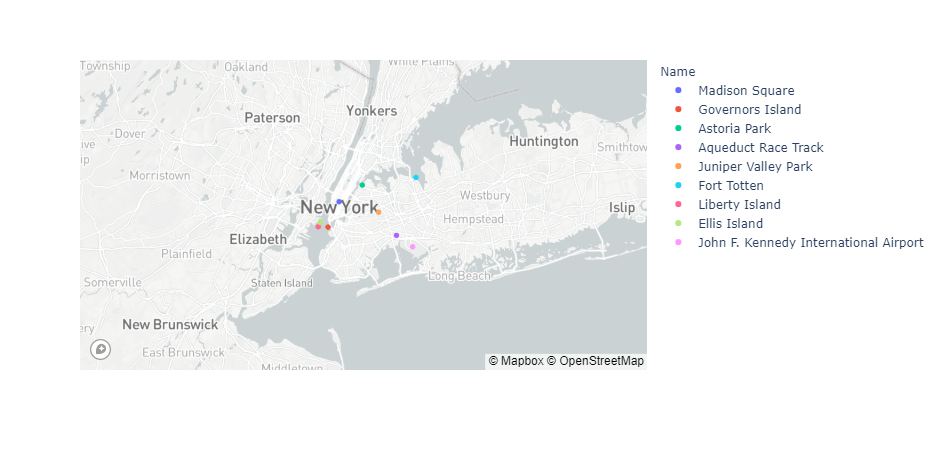

In [16]:
# Plot course for all stops
all_stops = places_of_interest[
    (places_of_interest["Name"].str.contains("Airport"))
    | (
        places_of_interest["Name"].isin(
            [
                "Aqueduct Race Track",
                "Astoria Park",
                "Fort Totten",
                "Juniper Valley Park",
                "Madison Square",
                "Governors Island", 
                "Liberty Island", 
                "Ellis Island"
            ]
        )
    )
]
all_stops= px.scatter_mapbox(all_stops, lat="Latitude", lon="Longitude", color="Name")
all_stops.show()